In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [10]:
# Load the data into a dataframe
data = pd.read_csv("../Data.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])
display(data)

,event,x,y,z,t
0,1,-0.133462,0.657779,0.536440,682.766
1,1,-0.133512,0.659146,0.534653,687.768
2,1,-0.135312,0.662602,0.529912,711.916
3,1,-0.134597,0.664262,0.514785,800.602
4,1,-0.136063,0.665115,0.509624,822.243
...,...,...,...,...,...
1057,1,-0.147630,0.686471,-0.164786,2488.450
1058,1,-0.147494,0.686654,-0.165221,2488.690
1059,1,-0.148182,0.688555,-0.166153,2492.910
1060,1,-0.148094,0.687913,-0.166690,2493.420


(array([  8.,  40.,  86., 117., 146., 138., 116., 139., 132., 140.]),
 array([ 682.766 ,  863.8984, 1045.0308, 1226.1632, 1407.2956, 1588.428 ,
        1769.5604, 1950.6928, 2131.8252, 2312.9576, 2494.09  ]),
 <BarContainer object of 10 artists>)

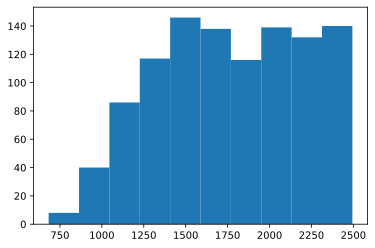

In [11]:
# Make a plot of the timing profile of the EL emission

plt.figure()
plt.hist(data["t"], bins = 100)
